<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

_Author: Unknown_

------

**OBJECTIVES**

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [79]:
cali_df = pd.DataFrame(data= np.c_[cali['data'], cali['target']],
                       columns= cali['feature_names'] + ['target'])

In [80]:
cali_df['price'] = cali['target']
cali_df.drop(columns='target', inplace=True)
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Part 2

Create a train/test split using some of the features in your X and setting y to be the `price` column.

In [81]:
X = cali_df.drop(columns='price')
y = cali_df['price']

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc  = sc.transform(X_test)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [85]:
model = Sequential()

In [86]:
X_train.shape

(15480, 8)

In [88]:
model.add(Dense(24, activation='relu',
                input_shape=(8,)))
model.add(Dense(1, activation='linear'))

Set up the compilation of the network.  Use an `adam` optimizer and appropriate loss function with the mean squared error metric.

In [90]:
model.compile(loss='mse', optimizer='adam',
              metrics=['mse'])

### Part 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [91]:
history = model.fit(X_train_sc,y_train,epochs=100,
                    batch_size=128,verbose=0,
                    validation_data=(X_test_sc,y_test))

### Part 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

In [92]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

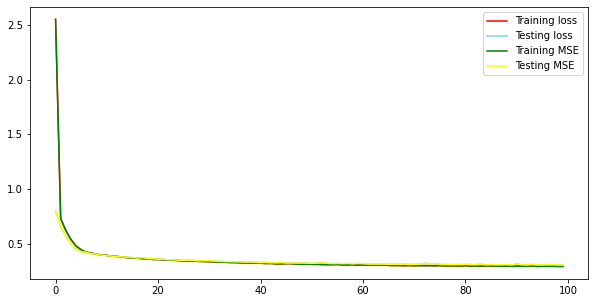

In [93]:
train_loss = history.history['loss']
test_loss =  history.history['val_loss']
train_mse =  history.history['mse']
test_mse  =  history.history['val_mse']

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training loss', color='red')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_mse, label='Training MSE', color='green')
plt.plot(test_mse, label='Testing MSE', color='yellow')
plt.legend();

### Part 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `ReLU` activation function.

In [94]:
model2 = Sequential()

In [95]:
model2.add(Dense(24, activation='relu',input_shape=(8,)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [96]:
model2.compile(loss='mse', optimizer='adam',
               metrics=['mse'])

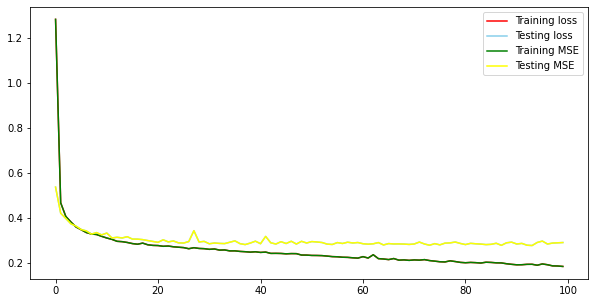

In [97]:
history2 = model2.fit(X_train_sc,y_train,epochs=100,
                     batch_size=128,verbose=0,
                     validation_data=(X_test_sc,y_test))
train_loss2 = history2.history['loss']
test_loss2 =  history2.history['val_loss']
train_mse2 =  history2.history['mse']
test_mse2  =  history2.history['val_mse']

plt.figure(figsize=(10, 5))
plt.plot(train_loss2, label='Training loss', color='red')
plt.plot(test_loss2, label='Testing loss', color='skyblue')
plt.plot(train_mse2, label='Training MSE', color='green')
plt.plot(test_mse2, label='Testing MSE', color='yellow')
plt.legend();

### Part 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.

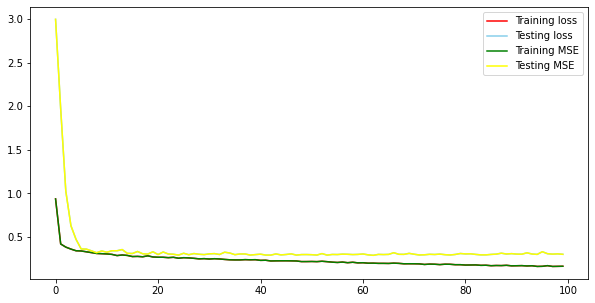

In [99]:
model3 = Sequential()
# ===========================================
model3.add(Dense(24, activation='relu',input_shape=(8,)))
model3.add(Dense(64, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1, activation='linear'))
# ============================================
model3.compile(loss='mse', optimizer='adam',
               metrics=['mse'])
# ============================================
history3 = model3.fit(X_train_sc,y_train,epochs=100,
                     batch_size=128,verbose=0,
                     validation_data=(X_test_sc,y_test))
train_loss3 = history3.history['loss']
test_loss3 =  history3.history['val_loss']
train_mse3 =  history3.history['mse']
test_mse3  =  history3.history['val_mse']

plt.figure(figsize=(10, 5))
plt.plot(train_loss3, label='Training loss', color='red')
plt.plot(test_loss3, label='Testing loss', color='skyblue')
plt.plot(train_mse3, label='Training MSE', color='green')
plt.plot(test_mse3, label='Testing MSE', color='yellow')
plt.legend();

##### Does this change anything?

In [ ]:
# not much

### Part 8

Early Stopping.  It seems that we may not need all 100 epochs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [106]:
es = EarlyStopping(patience=5)

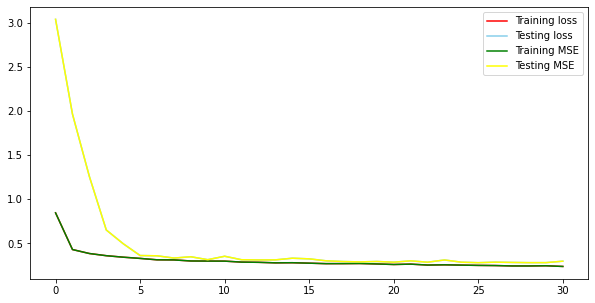

In [107]:
model4 = Sequential()
# ===========================================
model4.add(Dense(24, activation='relu',input_shape=(8,)))
model4.add(Dense(64, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(1, activation='linear'))
# ============================================
model4.compile(loss='mse', optimizer='adam',
               metrics=['mse'])
# ============================================
history4 = model4.fit(X_train_sc,y_train,epochs=100,
                     batch_size=128,verbose=0,
                     callbacks=[es], 
                     validation_data=(X_test_sc,y_test))
train_loss4 = history4.history['loss']
test_loss4 =  history4.history['val_loss']
train_mse4 =  history4.history['mse']
test_mse4  =  history4.history['val_mse']

plt.figure(figsize=(10, 5))
plt.plot(train_loss4, label='Training loss', color='red')
plt.plot(test_loss4, label='Testing loss', color='skyblue')
plt.plot(train_mse4, label='Training MSE', color='green')
plt.plot(test_mse4, label='Testing MSE', color='yellow')
plt.legend();

### Part 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

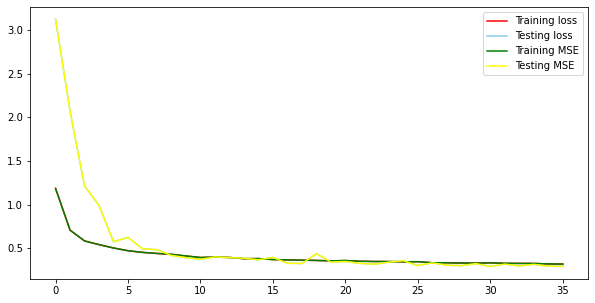

In [108]:
model5 = Sequential()
# ===========================================
model5.add(Dense(24, activation='relu',input_shape=(8,)))
model5.add(Dense(64, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(.5))
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(.2))
model5.add(Dense(1, activation='linear'))
# ============================================
model5.compile(loss='mse', optimizer='adam',
               metrics=['mse'])
# ============================================
history5 = model5.fit(X_train_sc,y_train,epochs=100,
                     batch_size=128,verbose=0,
                     callbacks=[es], 
                     validation_data=(X_test_sc,y_test))
train_loss5 = history5.history['loss']
test_loss5 =  history5.history['val_loss']
train_mse5 =  history5.history['mse']
test_mse5  =  history5.history['val_mse']

plt.figure(figsize=(10, 5))
plt.plot(train_loss5, label='Training loss', color='red')
plt.plot(test_loss5, label='Testing loss', color='skyblue')
plt.plot(train_mse5, label='Training MSE', color='green')
plt.plot(test_mse5, label='Testing MSE', color='yellow')
plt.legend();

### Part 9 - continued: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [119]:
rmse_train_base = np.sqrt(np.mean(history.history['mse'])) 
rmse_test_base  = np.sqrt(np.mean(history.history['val_mse']))
# ============================================================
rmse_train = np.sqrt(np.mean(history5.history['mse']))
rmse_test  = np.sqrt(np.mean(history5.history['val_mse']))
# ============================================================
print(f'RMSE train model5: {rmse_train}')
print(f'RMSE test model5:  {rmse_test}')
print()
print(f'RMSE train base:   {rmse_train_base}')
print(f'RMSE test base:    {rmse_test_base}')

RMSE train model5: 0.6415050020397429
RMSE test model5:  0.7292511402880867

RMSE train base:   0.5965689725909389
RMSE test base:    0.5871192032834661


### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

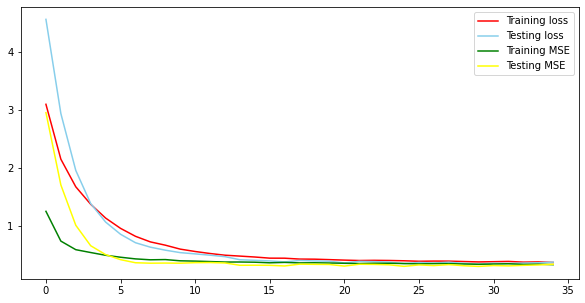

In [120]:
model6 = Sequential()
# ===========================================
model6.add(Dense(24, activation='relu',input_shape=(8,)))
model6.add(Dense(64, activation='relu',
                kernel_regularizer=l2(.01)))
model6.add(BatchNormalization())
model6.add(Dense(128, activation='relu',
                kernel_regularizer=l2(.01)))
model6.add(Dropout(.5))
model6.add(Dense(64, activation='relu',
                kernel_regularizer=l2(.01)))
model6.add(Dropout(.2))
model6.add(Dense(1, activation='linear'))
# ============================================
model6.compile(loss='mse', optimizer='adam',
               metrics=['mse'])
# ============================================
history6 = model6.fit(X_train_sc,y_train,epochs=100,
                     batch_size=128,verbose=0,
                     callbacks=[es], 
                     validation_data=(X_test_sc,y_test))
train_loss6 = history6.history['loss']
test_loss6 =  history6.history['val_loss']
train_mse6 =  history6.history['mse']
test_mse6  =  history6.history['val_mse']

plt.figure(figsize=(10, 5))
plt.plot(train_loss6, label='Training loss', color='red')
plt.plot(test_loss6, label='Testing loss', color='skyblue')
plt.plot(train_mse6, label='Training MSE', color='green')
plt.plot(test_mse6, label='Testing MSE', color='yellow')
plt.legend();

### Part 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [123]:
model6.save('nice_model')

INFO:tensorflow:Assets written to: nice_model\assets
